# Exploring Cities (Mexico City and Tokyo)

## Exploring Mexico City

### Gather Colonias from Mexico City and Clean data

In [2]:
#load the file
import pandas as pd
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df = pd.read_csv('coloniascdmx.csv')
df.head()

,COLONIA,ENTIDAD,Geo Point,Geo Shape,CVE_ALC,ALCALDIA,CVE_COL,SECC_COM,SECC_PAR
0,LOMAS DE CHAPULTEPEC,9.0,"19.4228411174,-99.2157935754","{""type"": ""Polygon"", ""coordinates"": [[[-99.2201...",16,MIGUEL HIDALGO,16-042,"4924, 4931, 4932, 4935, 4936, 4940, 4987","4923, 4937, 4938, 4939, 4942"
1,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),9.0,"19.4106158914,-99.2262487268","{""type"": ""Polygon"", ""coordinates"": [[[-99.2296...",16,MIGUEL HIDALGO,16-044,4963,4964
2,DEL BOSQUE (POLANCO),9.0,"19.4342189235,-99.2094037513","{""type"": ""Polygon"", ""coordinates"": [[[-99.2082...",16,MIGUEL HIDALGO,16-026,NaN,"4918, 4919"
3,PEDREGAL DE SANTA URSULA I,9.0,"19.314862237,-99.1477954505","{""type"": ""Polygon"", ""coordinates"": [[[-99.1458...",3,COYOACAN,03-135,"433, 500, 431, 513, 501","424, 425, 426, 430, 499"
4,AJUSCO I,9.0,"19.324571116,-99.1561602234","{""type"": ""Polygon"", ""coordinates"": [[[-99.1585...",3,COYOACAN,03-128,"376, 377, 378, 379, 404, 493, 498",374


In [4]:
df.head()

,COLONIA,ENTIDAD,Geo Point,Geo Shape,CVE_ALC,ALCALDIA,CVE_COL,SECC_COM,SECC_PAR
0,LOMAS DE CHAPULTEPEC,9.0,"19.4228411174,-99.2157935754","{""type"": ""Polygon"", ""coordinates"": [[[-99.2201...",16,MIGUEL HIDALGO,16-042,"4924, 4931, 4932, 4935, 4936, 4940, 4987","4923, 4937, 4938, 4939, 4942"
1,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),9.0,"19.4106158914,-99.2262487268","{""type"": ""Polygon"", ""coordinates"": [[[-99.2296...",16,MIGUEL HIDALGO,16-044,4963,4964
2,DEL BOSQUE (POLANCO),9.0,"19.4342189235,-99.2094037513","{""type"": ""Polygon"", ""coordinates"": [[[-99.2082...",16,MIGUEL HIDALGO,16-026,NaN,"4918, 4919"
3,PEDREGAL DE SANTA URSULA I,9.0,"19.314862237,-99.1477954505","{""type"": ""Polygon"", ""coordinates"": [[[-99.1458...",3,COYOACAN,03-135,"433, 500, 431, 513, 501","424, 425, 426, 430, 499"
4,AJUSCO I,9.0,"19.324571116,-99.1561602234","{""type"": ""Polygon"", ""coordinates"": [[[-99.1585...",3,COYOACAN,03-128,"376, 377, 378, 379, 404, 493, 498",374


In [5]:
#lets cconvert Geo Point to latitud, Longitude
df[['Latitude','Longitude']] = df['Geo Point'].str.split(',',expand=True) 

In [6]:
# lets convert objet to float
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)


In [7]:
df.dtypes

COLONIA       object
ENTIDAD      float64
Geo Point     object
Geo Shape     object
CVE_ALC        int64
ALCALDIA      object
CVE_COL       object
SECC_COM      object
SECC_PAR      object
Latitude     float64
Longitude    float64
dtype: object

In [8]:
# verify which fields are null
nulos = df.isnull().any()
print(nulos)

COLONIA      False
ENTIDAD       True
Geo Point     True
Geo Shape     True
CVE_ALC      False
ALCALDIA     False
CVE_COL      False
SECC_COM      True
SECC_PAR      True
Latitude      True
Longitude     True
dtype: bool


In [9]:
#drop those rows wich latitud or longitude are nulls
df.dropna(subset=['Latitude', 'Longitude'],inplace=True)
#df.dropna(axis=1,inplace=True) 

In [10]:
nulos = df.isnull().any()
print(nulos)

COLONIA      False
ENTIDAD       True
Geo Point    False
Geo Shape    False
CVE_ALC      False
ALCALDIA     False
CVE_COL      False
SECC_COM      True
SECC_PAR      True
Latitude     False
Longitude    False
dtype: bool


In [11]:
# drop columns that are useless 
df.drop(['Geo Point'],inplace=True,axis = 1)
df.drop(['SECC_COM'],inplace=True,axis = 1)
df.drop(['SECC_PAR'],inplace=True,axis = 1)
df.drop(['CVE_COL'],inplace=True,axis = 1)
df.drop(['CVE_ALC'],inplace=True,axis = 1)
df.drop(['ENTIDAD'],inplace=True,axis = 1)
df.drop(['Geo Shape'],inplace=True,axis = 1)


In [12]:
df.head()

,COLONIA,ALCALDIA,Latitude,Longitude
0,LOMAS DE CHAPULTEPEC,MIGUEL HIDALGO,19.422841,-99.215794
1,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),MIGUEL HIDALGO,19.410616,-99.226249
2,DEL BOSQUE (POLANCO),MIGUEL HIDALGO,19.434219,-99.209404
3,PEDREGAL DE SANTA URSULA I,COYOACAN,19.314862,-99.147795
4,AJUSCO I,COYOACAN,19.324571,-99.156160


In [13]:

alcaldias = df.groupby(['ALCALDIA','COLONIA']).count()
print(alcaldias)

                                             Latitude  Longitude
ALCALDIA       COLONIA                                          
ALVARO OBREGON 19 DE MAYO                           1          1
               1RA VICTORIA                         1          1
               1RA VICTORIA SECCION BOSQUES         1          1
               26 DE JULIO                          1          1
               2DA  JALALPA TEPITO (AMPL)           1          1
...                                               ...        ...
XOCHIMILCO     TIERRA NUEVA                         1          1
               TLAXOPAN                             1          1
               VILLA XOCHIMILCO (U HAB)             1          1
               XALTOCAN (BARR)                      1          1
               XICALHUACAN                          1          1

[1808 rows x 2 columns]


In [14]:
colonias = df.groupby(['ALCALDIA'])['COLONIA'].count()
colonias

ALCALDIA
ALVARO OBREGON            249
AZCAPOTZALCO              111
BENITO JUAREZ              64
COYOACAN                  153
CUAJIMALPA DE MORELOS      43
CUAUHTEMOC                 63
GUSTAVO A. MADERO         232
IZTACALCO                  55
IZTAPALAPA                293
LA MAGDALENA CONTRERAS     52
MIGUEL HIDALGO             88
MILPA ALTA                 11
TLAHUAC                    58
TLALPAN                   177
VENUSTIANO CARRANZA        80
XOCHIMILCO                 79
Name: COLONIA, dtype: int64

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

print('Libraries imported.')



Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.3.0               |     pyhd3deb0d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36he6145b8_1001         347 KB  conda-forge
    ca-certificates-2020.11.8  |       ha878542_0         145 KB  conda-forge
    certifi-2020.11.8          |   py36h5fab9bb

In [16]:
# get the latitude and longitud for Mexico City
address = 'Mexico City'

geolocator = Nominatim(user_agent="Mexico_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

19.4326296 -99.1331785


### Map all Colonias in Mexico CIty

In [17]:
# create map of Mexico City using latitude and longitude values
map_CDMX = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, ALCALDIA, COLONIA in zip(df['Latitude'], df['Longitude'], df['ALCALDIA'], df['COLONIA']):
    label = '{}, {}'.format(ALCALDIA, COLONIA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_CDMX)  
    
map_CDMX

In [18]:
map_CDMX.save('CDMX_Alcaldia_map.html')


### Graph number of Colonias by Alcaldia

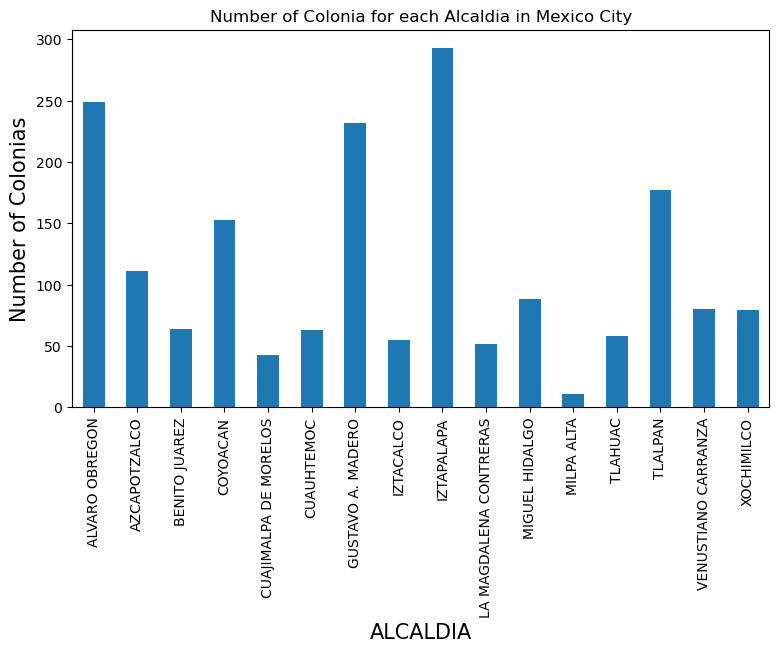

In [19]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(9,5),dpi=100)
plt.title("Number of Colonia for each Alcaldia in Mexico City")
plt.xlabel('Alcaldia',fontsize=15)
plt.ylabel('Number of Colonias',fontsize=15)
df.groupby('ALCALDIA')['COLONIA'].count().plot(kind='bar')
plt.legend
plt.show()

In [20]:
plt.savefig('MexicoCity_byAlcaldia.png')

<Figure size 432x288 with 0 Axes>

In [21]:
CDMX_data = df

* we will work with ALVARO OBREGON  

In [22]:
CDMX_data = df[df['ALCALDIA'] == 'ALVARO OBREGON'].reset_index(drop=True)
CDMX_data.head()

,COLONIA,ALCALDIA,Latitude,Longitude
0,OLIVAR DEL CONDE 2DA SECCION I,ALVARO OBREGON,19.372387,-99.215972
1,OLIVAR DEL CONDE 1RA SECCION II,ALVARO OBREGON,19.374600,-99.209961
2,1RA VICTORIA,ALVARO OBREGON,19.386825,-99.202189
3,RESIDENCIAL MARIA ISABEL,ALVARO OBREGON,19.335372,-99.223340
4,TLACUITLAPA,ALVARO OBREGON,19.352805,-99.241363


In [23]:
CDMX_data.shape

(249, 4)

### Creating map of ALVARO OBREGON

In [25]:
address = 'ALVARO OBREGON, MEX'

geolocator = Nominatim(user_agent="ALVARO_OBREGON_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ALVARO OBREGON are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of ALVARO OBREGON are 19.6399761, -99.2878644.


In [26]:
# create map of Mexico using latitude and longitude values
map_CDMX = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, ALCALDIA, COLONIA in zip(CDMX_data['Latitude'], CDMX_data['Longitude'], CDMX_data['ALCALDIA'], CDMX_data['COLONIA']):
    label = '{}, {}'.format(ALCALDIA, COLONIA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_CDMX)  
    
map_CDMX

In [27]:
map_CDMX.save('CDMX_AlvaroObregon_map.html')

### Explore Foursquare

#### Explore conly one ALCALDIA ---> ALBARO OBREGON

In [28]:
cuantos = CDMX_data.groupby(['ALCALDIA']).count()
cuantos

,COLONIA,Latitude,Longitude
ALCALDIA,,,
ALVARO OBREGON,249,249,249


In [29]:
CDMX_data.head()

,COLONIA,ALCALDIA,Latitude,Longitude
0,OLIVAR DEL CONDE 2DA SECCION I,ALVARO OBREGON,19.372387,-99.215972
1,OLIVAR DEL CONDE 1RA SECCION II,ALVARO OBREGON,19.374600,-99.209961
2,1RA VICTORIA,ALVARO OBREGON,19.386825,-99.202189
3,RESIDENCIAL MARIA ISABEL,ALVARO OBREGON,19.335372,-99.223340
4,TLACUITLAPA,ALVARO OBREGON,19.352805,-99.241363


In [30]:
import requests # library to handle requests

In [24]:
def Get_Number_Of_Venues(ID, category):
    for i in range(len(CDMX_data)):
        p_lat =CDMX_data.iloc[i,2]
        p_lon =CDMX_data.iloc[i,3]
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,p_lat,p_lon,VERSION,ID,radius,LIMIT) 
#        url = 'https://api.foursquare.com/v2/venues/search?categoryId={}&client_id={}&client_secret={}&ll={},{}&v={}&radius=radius&limit={}'.format(CLIENT_ID,CLIENT_SECRET,p_lat,p_lon,VERSION,ID,radius,LIMIT) 
        test_results = requests.get(url).json()
        test_venue = test_results['response']['venues']
        count = np.shape(test_venue)
        CDMX_data.loc[i, category] = count[0]

In [340]:
# credentiall for Foursquare
# @hidden_cell
CLIENT_ID = 'NHIXGHAJZ4Q2VVOTOAYF4X4MCITPJMSRNGACMTQKNWLSBGGP' # your Foursquare ID
CLIENT_SECRET = 'DX0EKLBDAY2OKMPOW0YE4Y5B2CL5UCP1WLSEAPHCGT4BS52D' # your Foursquare Secret
VERSION = '20180604'
radius = 500
LIMIT = 100

In [174]:
CDMX_data.head()

,Cluster_Labels,COLONIA,ALCALDIA,Latitude,Longitude,Mexican Restaurant,Japanese Restaurant
0,1,OLIVAR DEL CONDE 2DA SECCION I,ALVARO OBREGON,19.372387,-99.215972,48.0,2.0
1,1,OLIVAR DEL CONDE 1RA SECCION II,ALVARO OBREGON,19.374600,-99.209961,42.0,1.0
2,1,1RA VICTORIA,ALVARO OBREGON,19.386825,-99.202189,49.0,3.0
3,2,RESIDENCIAL MARIA ISABEL,ALVARO OBREGON,19.335372,-99.223340,17.0,0.0
4,2,TLACUITLAPA,ALVARO OBREGON,19.352805,-99.241363,16.0,0.0


In [187]:
CDMX_data['Mexican Restaurant'] = ''
CDMX_data['Japanese Restaurant'] = ''

In [ ]:
Get_Number_Of_Venues('4bf58dd8d48988d1c1941735','Mexican Restaurant')
Get_Number_Of_Venues( '4bf58dd8d48988d111941735','Japanese Restaurant')

In [32]:
CDMX_data.dtypes

Unnamed: 0               int64
COLONIA                 object
ALCALDIA                object
Latitude               float64
Longitude              float64
Mexican Restaurant     float64
Japanese Restaurant    float64
dtype: object

In [48]:
#CDMX_data.drop(['Mexican'],inplace=True,axis = 1)
#CDMX_data.drop(['Japanese'],inplace=True,axis = 1)


In [270]:
CDMX_data.rename(columns={'Mexican Restaurant':'Mexican',
                          'Japanese Restaurant':'Japanese'},inplace=True)

In [272]:
CDMX_data.drop(['Unnamed: 0'],inplace=True,axis = 1)


In [31]:
#CDMX_data = pd.read_csv('ALVARO-OBREGON-Cuisenes.csv')

In [35]:
CDMX_data.head()

,COLONIA,ALCALDIA,Latitude,Longitude,Mexican,Japanese
0,OLIVAR DEL CONDE 2DA SECCION I,ALVARO OBREGON,19.372387,-99.215972,48.0,2.0
1,OLIVAR DEL CONDE 1RA SECCION II,ALVARO OBREGON,19.374600,-99.209961,42.0,1.0
2,1RA VICTORIA,ALVARO OBREGON,19.386825,-99.202189,49.0,3.0
3,RESIDENCIAL MARIA ISABEL,ALVARO OBREGON,19.335372,-99.223340,17.0,0.0
4,TLACUITLAPA,ALVARO OBREGON,19.352805,-99.241363,16.0,0.0


In [274]:
CDMX_Japanese = CDMX_data[CDMX_data['Japanese'] > 0] 
CDMX_Japanese['Japanese'].sum()
CDMX_Japanese.head()
#CDMX_data.sort_values(by=['Japanese'],ascending=False)
#CDMX_Japanese.sort_values(by=['Japanese'],ascending=False)


,COLONIA,ALCALDIA,Latitude,Longitude,Mexican,Japanese
0,OLIVAR DEL CONDE 2DA SECCION I,ALVARO OBREGON,19.372387,-99.215972,48.0,2.0
1,OLIVAR DEL CONDE 1RA SECCION II,ALVARO OBREGON,19.374600,-99.209961,42.0,1.0
2,1RA VICTORIA,ALVARO OBREGON,19.386825,-99.202189,49.0,3.0
5,BELEN DE LAS FLORES (U HAB),ALVARO OBREGON,19.385433,-99.222982,23.0,1.0
6,TOLTECA,ALVARO OBREGON,19.390510,-99.197489,49.0,2.0


In [37]:
CDMX_Japanese.describe()

,Latitude,Longitude,Mexican,Japanese
count,150.000000,150.000000,150.000000,150.000000
mean,19.370020,-99.218559,32.326667,2.486667
std,0.016982,0.018994,14.228479,2.097415
min,19.319742,-99.258695,2.000000,1.000000
25%,19.358790,-99.234287,21.250000,1.000000
50%,19.371357,-99.217402,31.500000,2.000000
75%,19.384537,-99.202532,47.000000,3.000000
max,19.401334,-99.174940,50.000000,16.000000


#### Generate map using only those locations with Japanese restaurants

In [38]:
# create map of Mexico using latitude and longitude values
map_CDMX = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, ALCALDIA, COLONIA, Japanese, Mexican in zip(CDMX_Japanese['Latitude'], CDMX_Japanese['Longitude'], CDMX_Japanese['ALCALDIA'], CDMX_Japanese['COLONIA'], CDMX_Japanese['Japanese'], CDMX_Japanese['Mexican']):
    label = '{}, {}'.format(Japanese, Mexican)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_CDMX)  
    
map_CDMX

In [39]:
map_CDMX.save('CDMX_AlbaroObregon_Cuisines_map.html')

### Create Clusters

In [275]:
CDMX_cluster = CDMX_Japanese.iloc[:,5:]
cluster_num = 3
CDMX_kmeans = KMeans(n_clusters = cluster_num, random_state = 0).fit(CDMX_cluster)

In [278]:
CDMX_Japanese.head()

,COLONIA,ALCALDIA,Latitude,Longitude,Mexican,Japanese
0,OLIVAR DEL CONDE 2DA SECCION I,ALVARO OBREGON,19.372387,-99.215972,48.0,2.0
1,OLIVAR DEL CONDE 1RA SECCION II,ALVARO OBREGON,19.374600,-99.209961,42.0,1.0
2,1RA VICTORIA,ALVARO OBREGON,19.386825,-99.202189,49.0,3.0
5,BELEN DE LAS FLORES (U HAB),ALVARO OBREGON,19.385433,-99.222982,23.0,1.0
6,TOLTECA,ALVARO OBREGON,19.390510,-99.197489,49.0,2.0


In [276]:
CDMX_Japanese.insert(0,'Cluster_Labels', CDMX_kmeans.labels_)
CDMX_Japanese.head()

,Cluster_Labels,COLONIA,ALCALDIA,Latitude,Longitude,Mexican,Japanese
0,0,OLIVAR DEL CONDE 2DA SECCION I,ALVARO OBREGON,19.372387,-99.215972,48.0,2.0
1,0,OLIVAR DEL CONDE 1RA SECCION II,ALVARO OBREGON,19.374600,-99.209961,42.0,1.0
2,0,1RA VICTORIA,ALVARO OBREGON,19.386825,-99.202189,49.0,3.0
5,0,BELEN DE LAS FLORES (U HAB),ALVARO OBREGON,19.385433,-99.222982,23.0,1.0
6,0,TOLTECA,ALVARO OBREGON,19.390510,-99.197489,49.0,2.0


In [277]:
CDMX_Japanese['Cluster_Labels'].unique()
#color_options = {'beige', 'black', 'blue', 'cadetblue', 'darkblue', 'darkgreen', 'darkpurple', 'darkred', 'gray', 'green', 'lightblue', 'lightgray', 'lightgreen', 'lightred', 'orange', 'pink', 'purple', 'red', 'white'}¶


array([0, 2, 1], dtype=int32)

#### Map per cluster Japanese Restaurants

In [43]:
colordict = {0: 'darkblue', 1: 'darkgreen', 2: 'orange'}
cluster_map = folium.Map(location = [latitude, longitude], zoom_start = 11)
for lat, lng, Cuisine, COLONIA, cluster in zip(CDMX_Japanese['Latitude'], CDMX_Japanese['Longitude'], CDMX_Japanese['Japanese'],CDMX_Japanese['COLONIA'], CDMX_Japanese['Cluster_Labels']):
    label = 'Japanese Restaurants: {} Colonia: {} '.format(Cuisine, COLONIA)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = colordict[cluster],
                        fill_color=colordict[cluster],
                        fill = True, 
                        fill_opacity = 0.8, 
                        parse_html = False).add_to(cluster_map)
cluster_map

In [44]:
cluster_map.save('CDMX_Clusters_map.html')

In [294]:
CDMX_Cluster0 = CDMX_Japanese[CDMX_Japanese['Cluster_Labels']==0]
CDMX_Cluster0.describe()


,Cluster_Labels,Latitude,Longitude,Mexican,Japanese
count,123.0,123.000000,123.000000,123.000000,123.000000
mean,0.0,19.371443,-99.221411,29.869919,1.691057
std,0.0,0.016718,0.016159,13.975364,0.821136
min,0.0,19.319742,-99.253319,2.000000,1.000000
25%,0.0,19.360602,-99.234832,18.500000,1.000000
50%,0.0,19.374600,-99.222212,27.000000,1.000000
75%,0.0,19.384910,-99.207555,45.500000,2.000000
max,0.0,19.401334,-99.193557,50.000000,3.000000


In [323]:
CDMX_Cluster1 = CDMX_Japanese[CDMX_Japanese['Cluster_Labels']==1]
CDMX_Cluster1.head()

,Cluster_Labels,COLONIA,ALCALDIA,Latitude,Longitude,Mexican,Japanese
167,1,LOMAS DE SANTA FE II,ALVARO OBREGON,19.368131,-99.258695,50.0,16.0


In [300]:
CDMX_Cluster2 = CDMX_Japanese[CDMX_Japanese['Cluster_Labels']==2]
CDMX_Cluster2.describe()


,Cluster_Labels,Latitude,Longitude,Mexican,Japanese
count,26.0,26.000000,26.000000,26.000000,26.000000
mean,2.0,19.363362,-99.203519,43.269231,5.730769
std,0.0,0.017281,0.023158,9.314753,1.250846
min,2.0,19.336807,-99.257326,19.000000,4.000000
25%,2.0,19.350953,-99.204196,38.750000,5.000000
50%,2.0,19.361347,-99.194066,48.000000,6.000000
75%,2.0,19.378479,-99.191899,49.000000,6.000000
max,2.0,19.393369,-99.174940,50.000000,9.000000


#### Bar chart - Number of Colonias per Cluster 

In [278]:
CDMX_Japanese.head()

,Cluster_Labels,COLONIA,ALCALDIA,Latitude,Longitude,Mexican,Japanese
0,0,OLIVAR DEL CONDE 2DA SECCION I,ALVARO OBREGON,19.372387,-99.215972,48.0,2.0
1,0,OLIVAR DEL CONDE 1RA SECCION II,ALVARO OBREGON,19.374600,-99.209961,42.0,1.0
2,0,1RA VICTORIA,ALVARO OBREGON,19.386825,-99.202189,49.0,3.0
5,0,BELEN DE LAS FLORES (U HAB),ALVARO OBREGON,19.385433,-99.222982,23.0,1.0
6,0,TOLTECA,ALVARO OBREGON,19.390510,-99.197489,49.0,2.0


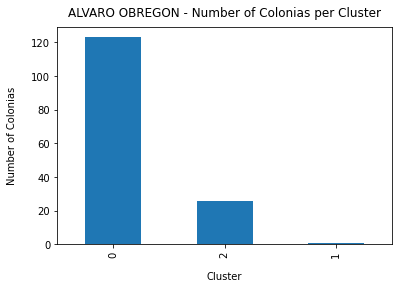

In [59]:
CDMX_Japanese['Cluster_Labels'].value_counts().plot(kind='bar')
plt.xlabel("Cluster", labelpad=14)
plt.ylabel("Number of Colonias", labelpad=14)
plt.title("ALVARO OBREGON - Number of Colonias per Cluster", y=1.02)

In [60]:
plt.savefig('CDMX_ALVAROOBREGON_Cluster.png')

<Figure size 432x288 with 0 Axes>

#### Percentages of number of Japanese restaurants per cluster

In [279]:
#Calculate total of Mexican Restaurants by Clusters
Total = CDMX_Japanese.groupby('Cluster_Labels')['Japanese'].sum()

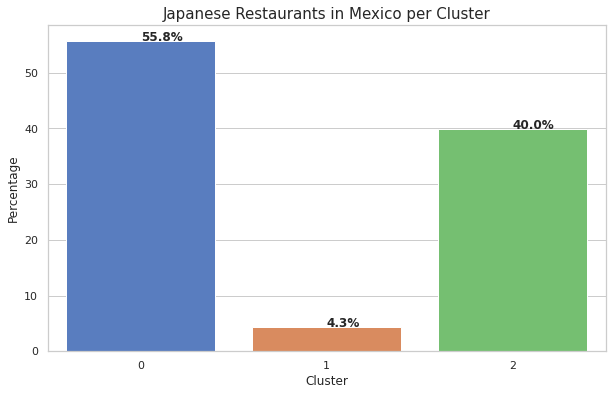

In [281]:
#Seaborn barplot
import seaborn as sns
%matplotlib inline
sns.set()
# calculate percentage of mexican restaurant per cluster
data_per = CDMX_Japanese.groupby('Cluster_Labels').agg(percentage = ('Japanese', lambda p: p.sum() / Total.sum() * 100)).round(2)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=data_per.index, y='percentage', data=data_per, ci=None, palette="muted",orient='v', )
ax.set_title("Japanese Restaurants in Mexico per Cluster", fontsize=15)
ax.set_xlabel ("Cluster")
ax.set_ylabel ("Percentage")
# calculate the percentages
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
bar.savefig("Tokyo_Seaborn_Pie_Chart.png");

In [282]:
plt.savefig('CDMX_ALVAROOBREGON_ClusterPercentage.png')

<Figure size 432x288 with 0 Axes>

## Exploring Tokyo

### Gather Wards from Tokyo and Clean data

In [4]:
df = pd.read_csv('Japan_WardTokyo_PostalCodes')
df.head()

,No.,Name,Kanji,Poblacion,Density(/km2),Area(km2),MajorDistricts,PostalCode
0,1,Chiyoda,千代田区,59441.0,5100.0,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",13101
1,2,Chūō,中央区,147620.0,14460.0,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",13102
2,3,Minato,港区,248071.0,12180.0,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",13103
3,4,Shinjuku,新宿区,339211.0,18620.0,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",13104
4,5,Bunkyō,文京区,223389.0,19790.0,11.29,"Hongō, Yayoi, Hakusan",13105


In [5]:
# save the number of districts per Ward
Data = df['MajorDistricts']
df['TotDistricts'] = ''
import string
for i in range(len(df)):
    res = sum([i.strip(string.punctuation).isalpha() for i in Data[i].split()]) 
    df.loc[i, ['TotDistricts']] = res


In [6]:
df.head()

,No.,Name,Kanji,Poblacion,Density(/km2),Area(km2),MajorDistricts,PostalCode,TotDistricts
0,1,Chiyoda,千代田区,59441.0,5100.0,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",13101,8
1,2,Chūō,中央区,147620.0,14460.0,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",13102,9
2,3,Minato,港区,248071.0,12180.0,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",13103,8
3,4,Shinjuku,新宿区,339211.0,18620.0,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",13104,8
4,5,Bunkyō,文京区,223389.0,19790.0,11.29,"Hongō, Yayoi, Hakusan",13105,3


In [123]:
df.dtypes

No.                 int64
Name               object
Kanji              object
Poblacion         float64
Density(/km2)     float64
Area(km2)         float64
MajorDistricts     object
PostalCode          int64
TotDistricts       object
                  float64
dtype: object

In [7]:
!pip install geopy 

In [8]:
df['Latitude'] = ''
df['Longitude'] = ''

In [9]:
df.head()

,No.,Name,Kanji,Poblacion,Density(/km2),Area(km2),MajorDistricts,PostalCode,TotDistricts,Latitude,Longitude
0,1,Chiyoda,千代田区,59441.0,5100.0,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",13101,8,,
1,2,Chūō,中央区,147620.0,14460.0,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",13102,9,,
2,3,Minato,港区,248071.0,12180.0,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",13103,8,,
3,4,Shinjuku,新宿区,339211.0,18620.0,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",13104,8,,
4,5,Bunkyō,文京区,223389.0,19790.0,11.29,"Hongō, Yayoi, Hakusan",13105,3,,


#### Obtain latitude & Longitude for wards

In [11]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Tokyo_explorer")

df['Major_Dist_Coord']= df['Kanji'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df

,No.,Name,Kanji,Poblacion,Density(/km2),Area(km2),MajorDistricts,PostalCode,TotDistricts,Latitude,Longitude,Major_Dist_Coord
0,1,Chiyoda,千代田区,59441.0,5100.0,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",13101,8,35.693810,139.753216,"(35.6938097, 139.7532163)"
1,2,Chūō,中央区,147620.0,14460.0,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",13102,9,35.666255,139.775565,"(35.666255, 139.775565)"
2,3,Minato,港区,248071.0,12180.0,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",13103,8,35.643227,139.740055,"(35.6432274, 139.7400553)"
3,4,Shinjuku,新宿区,339211.0,18620.0,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",13104,8,35.693763,139.703632,"(35.6937632, 139.7036319)"
4,5,Bunkyō,文京区,223389.0,19790.0,11.29,"Hongō, Yayoi, Hakusan",13105,3,35.718810,139.744732,"(35.71881, 139.744732)"
5,6,Taitō,台東区,200486.0,19830.0,10.11,"Ueno, Asakusa",13106,2,35.717450,139.790859,"(35.71745, 139.790859)"
6,7,Sumida,墨田区,260358.0,18910.0,13.77,"Kinshichō, Morishita, Ryōgoku",13107,3,35.700429,139.805017,"(35.700429, 139.805017)"
7,8,Kōtō,江東区,502579.0,12510.0,40.16,"Kiba, Ariake, Kameido, Tōyōchō, Monzennakachō,...",13108,11,35.649154,139.812790,"(35.649154, 139.81279)"
8,9,Shinagawa,品川区,392492.0,17180.0,22.84,"Shinagawa, Gotanda, Ōsaki, Hatanodai, Ōimachi,...",13109,6,35.599252,139.738910,"(35.599252, 139.73891)"
9,10,Meguro,目黒区,280283.0,19110.0,14.67,"Meguro, Nakameguro, Jiyugaoka, Komaba, Aobadai",13110,5,35.621250,139.688014,"(35.62125, 139.688014)"


In [12]:
df.drop(['Major_Dist_Coord'], axis=1, inplace=True)


In [13]:
# get the latitude and longitud for Tokyo City
address = 'Tokyo, Japan'

geolocator = Nominatim(user_agent="Tokyo_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

35.6828387 139.7594549


### Map all Tokyo Wards

In [14]:
# create map of Tokyo using latitude and longitude values
map_tokyo = folium.Map(location=[latitude, longitude], zoom_start=11)
 # add markers to map
for lat, lng, label, label2 in zip(df['Latitude'], df['Longitude'], df['Name'],df['TotDistricts']):
    label = 'Ward: {} Districts: {} '.format(label, label2)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tokyo) 
    
map_tokyo

In [15]:
map_tokyo.save('Tokyo_Ward_map.html')

### Graph number of Districts by Ward

In [16]:
df.head()

,No.,Name,Kanji,Poblacion,Density(/km2),Area(km2),MajorDistricts,PostalCode,TotDistricts,Latitude,Longitude
0,1,Chiyoda,千代田区,59441.0,5100.0,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",13101,8,35.693810,139.753216
1,2,Chūō,中央区,147620.0,14460.0,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",13102,9,35.666255,139.775565
2,3,Minato,港区,248071.0,12180.0,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",13103,8,35.643227,139.740055
3,4,Shinjuku,新宿区,339211.0,18620.0,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",13104,8,35.693763,139.703632
4,5,Bunkyō,文京区,223389.0,19790.0,11.29,"Hongō, Yayoi, Hakusan",13105,3,35.718810,139.744732


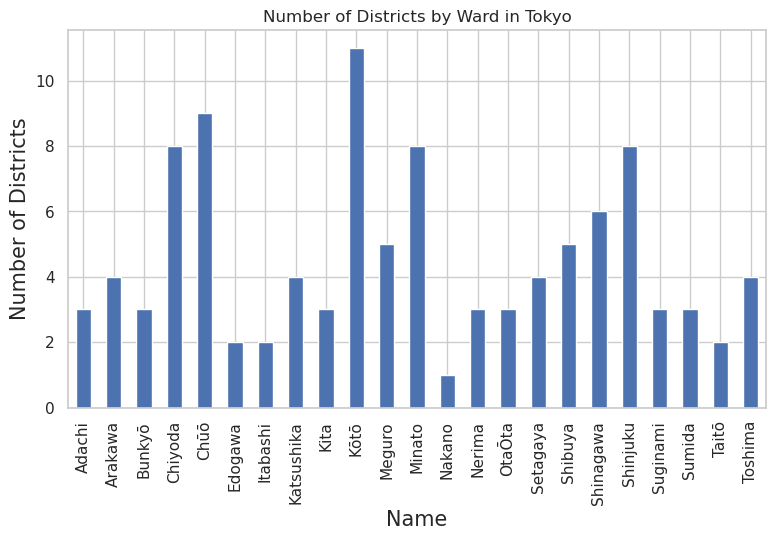

In [292]:
import matplotlib.pyplot  as plt
plt.figure(figsize=(9,5),dpi=100)
plt.title("Number of Districts by Ward in Tokyo")
plt.xlabel('Ward',fontsize=15)
plt.ylabel('Number of Districts',fontsize=15)
df.groupby('Name')['TotDistricts'].sum().plot(kind='bar')
plt.legend
plt.show()

In [293]:
plt.savefig('Tokyo_DistrictsPerWard.png')

<Figure size 432x288 with 0 Axes>

In [139]:
df.dtypes

No.                 int64
Name               object
Kanji              object
Poblacion         float64
Density(/km2)     float64
Area(km2)         float64
MajorDistricts     object
PostalCode          int64
TotDistricts       object
Latitude          float64
Longitude         float64
dtype: object

In [141]:
Tokyo_data = df

In [142]:
Tokyo_data.head()

,No.,Name,Kanji,Poblacion,Density(/km2),Area(km2),MajorDistricts,PostalCode,TotDistricts,Latitude,Longitude
0,1,Chiyoda,千代田区,59441.0,5100.0,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",13101,8,35.693810,139.753216
1,2,Chūō,中央区,147620.0,14460.0,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",13102,9,35.666255,139.775565
2,3,Minato,港区,248071.0,12180.0,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",13103,8,35.643227,139.740055
3,4,Shinjuku,新宿区,339211.0,18620.0,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",13104,8,35.693763,139.703632
4,5,Bunkyō,文京区,223389.0,19790.0,11.29,"Hongō, Yayoi, Hakusan",13105,3,35.718810,139.744732


### Explore Foursquare Tokyo

In [155]:
# credentiall for Foursquare
# @hidden_cell
CLIENT_ID = 'NHIXGHAJZ4Q2VVOTOAYF4X4MCITPJMSRNGACMTQKNWLSBGGP' # your Foursquare ID
CLIENT_SECRET = 'DX0EKLBDAY2OKMPOW0YE4Y5B2CL5UCP1WLSEAPHCGT4BS52D' # your Foursquare Secret
VERSION = '20180604'
radius = 500
LIMIT = 100

In [146]:
Tokyo_data['Mexican Restaurant'] = ''
Tokyo_data['Japanese Restaurant'] = ''

In [147]:
Tokyo_data.head()

,No.,Name,Kanji,Poblacion,Density(/km2),Area(km2),MajorDistricts,PostalCode,TotDistricts,Latitude,Longitude,Mexican Restaurant,Japanese Restaurant
0,1,Chiyoda,千代田区,59441.0,5100.0,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",13101,8,35.693810,139.753216,,
1,2,Chūō,中央区,147620.0,14460.0,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",13102,9,35.666255,139.775565,,
2,3,Minato,港区,248071.0,12180.0,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",13103,8,35.643227,139.740055,,
3,4,Shinjuku,新宿区,339211.0,18620.0,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",13104,8,35.693763,139.703632,,
4,5,Bunkyō,文京区,223389.0,19790.0,11.29,"Hongō, Yayoi, Hakusan",13105,3,35.718810,139.744732,,


In [156]:
def Get_Number_Of_Venues_Tokyo(ID, category):
    for i in range(len(Tokyo_data)):
        p_lat =Tokyo_data.iloc[i,9]
        p_lon =Tokyo_data.iloc[i,10]
        url = 'https://api.foursquare.com/v2/venues/search?client_aid={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,p_lat,p_lon,VERSION,ID,radius,LIMIT) 
        test_results = requests.get(url).json()
        test_venue = test_results['response']['venues']
        count = np.shape(test_venue)
        print('Cuisine', category, ' Cuantos = ', count, 'Ward = ', Tokyo_data.iloc[i,8])
        Tokyo_data.loc[i, category] = count[0]

In [ ]:
Get_Number_Of_Venues_Tokyo('4bf58dd8d48988d1c1941735','Mexican Restaurant')
Get_Number_Of_Venues_Tokyo('4bf58dd8d48988d111941735','Japanese Restaurant')

In [241]:
Tokyo_data.head()

,No.,Name,Kanji,Poblacion,Density(/km2),Area(km2),MajorDistricts,PostalCode,Latitude,Longitude,Mexican Restaurant,Japanese Restaurant
0,1,Chiyoda,千代田区,59441.0,5100.0,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,...",13101,35.693810,139.753216,2,50
1,2,Chūō,中央区,147620.0,14460.0,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb...",13102,35.666255,139.775565,1,50
2,3,Minato,港区,248071.0,12180.0,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong...",13103,35.643227,139.740055,1,50
3,4,Shinjuku,新宿区,339211.0,18620.0,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich...",13104,35.693763,139.703632,12,50
4,5,Bunkyō,文京区,223389.0,19790.0,11.29,"Hongō, Yayoi, Hakusan",13105,35.718810,139.744732,0,50


In [17]:
#Tokyo_data.to_csv('TokyoWards.csv')
#df.to_csv('TokyoWards.csv')
Tokyo_data = pd.read_csv('TokyoWards.csv')

In [18]:
Tokyo_data.head()

,Unnamed: 0,No.,Name,Kanji,Latitude,Longitude,Mexican,Japanese
0,0,1,Chiyoda,千代田区,35.693810,139.753216,2,50
1,1,2,Chūō,中央区,35.666255,139.775565,1,50
2,2,3,Minato,港区,35.643227,139.740055,1,50
3,3,4,Shinjuku,新宿区,35.693763,139.703632,12,50
4,4,5,Bunkyō,文京区,35.718810,139.744732,0,50


In [19]:
Tokyo_data.rename(columns={'Mexican Restaurant':'Mexican',
                          'Japanese Restaurant':'Japanese'},inplace=True)

In [20]:
Tokyo_data.drop(['Unnamed: 0'],inplace=True,axis = 1)
#Tokyo_data.drop(['Poblacion'],inplace=True,axis = 1)
#Tokyo_data.drop(['Density(/km2)'],inplace=True,axis = 1)
#Tokyo_data.drop(['Area(km2)'],inplace=True,axis = 1)
#Tokyo_data.drop(['MajorDistricts'],inplace=True,axis = 1)
#Tokyo_data.drop(['PostalCode'],inplace=True,axis = 1)

In [215]:
Tokyo_data.head()

,No.,Name,Kanji,Latitude,Longitude,Mexican,Japanese
0,1,Chiyoda,千代田区,35.693810,139.753216,2,50
1,2,Chūō,中央区,35.666255,139.775565,1,50
2,3,Minato,港区,35.643227,139.740055,1,50
3,4,Shinjuku,新宿区,35.693763,139.703632,12,50
4,5,Bunkyō,文京区,35.718810,139.744732,0,50


In [216]:
Tokyo_data.isnull().sum()

No.          0
Name         0
Kanji        0
Latitude     0
Longitude    0
Mexican      0
Japanese     0
dtype: int64

In [21]:
Tokyo_data['Mexican'] = Tokyo_data[Tokyo_data['Mexican']!=0]

In [22]:
Tokyo_data.head()

,No.,Name,Kanji,Latitude,Longitude,Mexican,Japanese
0,1,Chiyoda,千代田区,35.693810,139.753216,1,50
1,2,Chūō,中央区,35.666255,139.775565,2,50
2,3,Minato,港区,35.643227,139.740055,3,50
3,4,Shinjuku,新宿区,35.693763,139.703632,4,50
4,5,Bunkyō,文京区,35.718810,139.744732,NaN,50


In [25]:
Tokyo_data = Tokyo_data.dropna() 

In [26]:
Tokyo_data.dtypes

No.            int64
Name          object
Kanji         object
Latitude     float64
Longitude    float64
Mexican      float64
Japanese       int64
dtype: object

In [23]:
Tokyo_data['Mexican']=Tokyo_data['Mexican'].astype(float)

In [27]:
Tokyo_data = Tokyo_data[Tokyo_data['Mexican']!=0]

In [28]:
Tokyo_data.head()

,No.,Name,Kanji,Latitude,Longitude,Mexican,Japanese
0,1,Chiyoda,千代田区,35.693810,139.753216,1.0,50
1,2,Chūō,中央区,35.666255,139.775565,2.0,50
2,3,Minato,港区,35.643227,139.740055,3.0,50
3,4,Shinjuku,新宿区,35.693763,139.703632,4.0,50
5,6,Taitō,台東区,35.717450,139.790859,6.0,50


### map MExican Restaurants in Tokyo 

In [31]:
# create map of Mexico using latitude and longitude values
map_Tokyo = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Ward, Mexican, Japanese in zip(Tokyo_data['Latitude'], Tokyo_data['Longitude'], Tokyo_data['Name'], Tokyo_data['Mexican'], Tokyo_data['Japanese']):
    label = '{}, {}, {}'.format(Ward, Mexican, Japanese)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_Tokyo)  
    
map_Tokyo

In [32]:
map_Tokyo.save('Tokyo_Ward_Cuisine.html')

### Create Clusters

In [35]:
Tokyo_cluster = Tokyo_data.iloc[:,5:6]
Tokyo_cluster

,Mexican
0,1.0
1,2.0
2,3.0
3,4.0
5,6.0
6,7.0
10,11.0
12,13.0
14,15.0
15,16.0


In [36]:
cluster_num = 3
Tokyo_kmeans = KMeans(n_clusters = cluster_num, random_state = 0).fit(Tokyo_cluster)

In [37]:
Tokyo_data.insert(0,'Cluster_Labels', Tokyo_kmeans.labels_)


In [38]:
Tokyo_data.describe()

,Cluster_Labels,No.,Latitude,Longitude,Mexican,Japanese
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.800000,7.800000,35.677638,139.733341,7.800000,49.700000
std,0.788811,5.553777,0.048954,0.050378,5.553777,0.948683
min,0.000000,1.000000,35.561206,139.636288,1.000000,47.000000
25%,0.000000,3.250000,35.665010,139.706279,3.250000,50.000000
50%,1.000000,6.500000,35.693786,139.727949,6.500000,50.000000
75%,1.000000,12.500000,35.700195,139.769978,12.500000,50.000000
max,2.000000,16.000000,35.736156,139.805017,16.000000,50.000000


In [39]:
Tokyo_Cluster0 = Tokyo_data[Tokyo_data['Cluster_Labels']==0]
Tokyo_Cluster0.head()

,Cluster_Labels,No.,Name,Kanji,Latitude,Longitude,Mexican,Japanese
10,0,11,OtaŌta,大田区,35.561206,139.715843,11.0,50
12,0,13,Shibuya,渋谷区,35.664596,139.698711,13.0,50
14,0,15,Suginami,杉並区,35.699493,139.636288,15.0,50
15,0,16,Toshima,豊島区,35.736156,139.714222,16.0,50


In [40]:
Tokyo_Cluster1 = Tokyo_data[Tokyo_data['Cluster_Labels']==1]
Tokyo_Cluster1.head()

,Cluster_Labels,No.,Name,Kanji,Latitude,Longitude,Mexican,Japanese
0,1,1,Chiyoda,千代田区,35.693810,139.753216,1.0,50
1,1,2,Chūō,中央区,35.666255,139.775565,2.0,50
2,1,3,Minato,港区,35.643227,139.740055,3.0,50
3,1,4,Shinjuku,新宿区,35.693763,139.703632,4.0,50


In [41]:
Tokyo_Cluster2 = Tokyo_data[Tokyo_data['Cluster_Labels']==2]
Tokyo_Cluster2.head()

,Cluster_Labels,No.,Name,Kanji,Latitude,Longitude,Mexican,Japanese
5,2,6,Taitō,台東区,35.717450,139.790859,6.0,50
6,2,7,Sumida,墨田区,35.700429,139.805017,7.0,47


In [34]:
Tokyo_data.head()

,No.,Name,Kanji,Latitude,Longitude,Mexican,Japanese
0,1,Chiyoda,千代田区,35.693810,139.753216,1.0,50
1,2,Chūō,中央区,35.666255,139.775565,2.0,50
2,3,Minato,港区,35.643227,139.740055,3.0,50
3,4,Shinjuku,新宿区,35.693763,139.703632,4.0,50
5,6,Taitō,台東区,35.717450,139.790859,6.0,50


#### Map per cluster with  Mexican restaurants

In [42]:
colordict = {0: 'darkblue', 1: 'darkgreen', 2: 'red'}
cluster_map = folium.Map(location = [latitude, longitude], zoom_start = 11)
for lat, lng, Cuisine, Name, cluster in zip(Tokyo_data['Latitude'], Tokyo_data['Longitude'], Tokyo_data['Mexican'],Tokyo_data['Name'], Tokyo_data['Cluster_Labels']):
    label = 'Mexican Restaurants: {} Ward: {} '.format(Cuisine, Name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker([lat, lng], 
                        radius = 4, 
                        popup = label, 
                        color = colordict[cluster],
                        fill_color=colordict[cluster],
                        fill = True, 
                        fill_opacity = 0.8, 
                        parse_html = False).add_to(cluster_map)
cluster_map

In [183]:
cluster_map.save('Tokyo_Cluster.html')


#### Bar chart - Number of Wards per Cluster

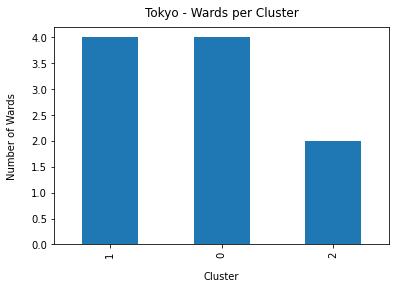

In [44]:

Tokyo_data['Cluster_Labels'].value_counts().plot(kind='bar')
plt.xlabel("Cluster", labelpad=14)
plt.ylabel("Number of Wards", labelpad=14)
plt.title("Tokyo - Wards per Cluster", y=1.02);

In [262]:
plt.savefig('Tokyo_Wards_Cluster.png')

<Figure size 432x288 with 0 Axes>

#### Percentage of Mexican Restaurants per cluster

In [45]:
#Calculate total of Mexican Restaurants by Clusters
Total = Tokyo_data.groupby('Cluster_Labels')['Mexican'].sum()

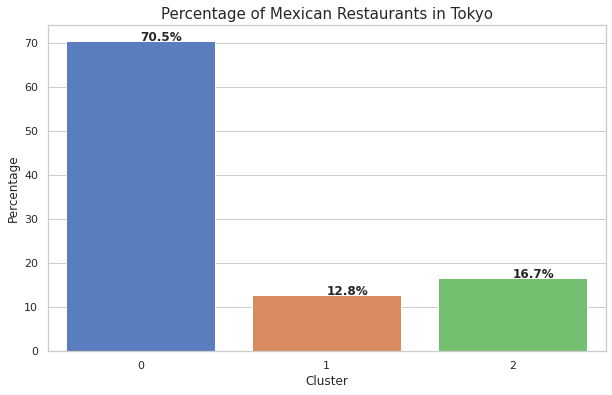

In [47]:
#Seaborn barplot
import seaborn as sns
%matplotlib inline
sns.set()
# calculate percentage of mexican restaurant per cluster
data_per = Tokyo_data.groupby('Cluster_Labels').agg(percentage = ('Mexican', lambda p: p.sum() / Total.sum() * 100)).round(2)

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=data_per.index, y='percentage', data=data_per, ci=None, palette="muted",orient='v', )
ax.set_title("Percentage of Mexican Restaurants in Tokyo", fontsize=15)
ax.set_xlabel ("Cluster")
ax.set_ylabel ("Percentage")
# calculate the percentages
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
bar.savefig("Tokyo_ClusterPercentage.png");